# Movie Recommending System
Done by - Basavaraj Kundangar as a part of internship offered by **Infopillar Solution**

## Objective

Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. 
In this task we have to bulid model of Movie recommender by using python and machine learning.

### Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import os
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("D:\Internship\Infopillar\Movie_Recommendation")

### Getting the Data

In [3]:
# Reading two files movies and ratings
movies=pd.read_csv("movies.csv")
ratings=pd.read_csv('ratings.csv')

In [4]:
# Number of rows and columns in file movie
movies.shape

(10329, 3)

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# Number of rows and columns in file rating
ratings.shape

(105339, 4)

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [8]:
# Merging the two files movie and rating on movieid column as common
dataset=pd.merge(movies,ratings,on='movieId')

In [9]:
dataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [10]:
# Information of data types of each columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  int64  
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


From above analysis we can see that the column timestamp is having datatype as int so we ahve to convert it into datetime format

In [11]:
# Coverting datatype of column timestamp
dataset['timestamp']=dataset['timestamp'].astype('datetime64[ns]')

In [12]:
# Again checking datatype of timestamp column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    105339 non-null  int64         
 1   title      105339 non-null  object        
 2   genres     105339 non-null  object        
 3   userId     105339 non-null  int64         
 4   rating     105339 non-null  float64       
 5   timestamp  105339 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.6+ MB


In [13]:
# Statistical Analysis
dataset.describe()

,movieId,userId,rating
count,105339.000000,105339.000000,105339.000000
mean,13381.312477,364.924539,3.516850
std,26170.456869,197.486905,1.044872
min,1.000000,1.000000,0.500000
25%,1073.000000,192.000000,3.000000
50%,2497.000000,383.000000,3.500000
75%,5991.000000,557.000000,4.000000
max,149532.000000,668.000000,5.000000


## Exploratory Data Analysis

Let's create a ratings dataframe with average rating and number of ratings:

In [14]:
# Average Ratings
dataset.groupby("title")['rating'].mean().sort_values(ascending=False).head()

title
Being Human (1993)                   5.0
Three Ages (1923)                    5.0
The Liberator (2013)                 5.0
October Baby (2011)                  5.0
Resident Evil: Retribution (2012)    5.0
Name: rating, dtype: float64

In [15]:
# Number of ratings
dataset.groupby("title")['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [16]:
# Creating one dataframe for number of ratings
ratings=pd.DataFrame(dataset.groupby("title")['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [17]:
# Adding Number of ratings columns to dataframe ratings
ratings['Number of ratings']=pd.DataFrame(dataset.groupby("title")['rating'].count())

In [18]:
ratings.describe()

,rating,Number of ratings
count,10323.000000,10323.000000
mean,3.177222,10.204301
std,0.817540,22.834557
min,0.500000,1.000000
25%,2.750000,1.000000
50%,3.272727,3.000000
75%,3.750000,8.000000
max,5.000000,325.000000


# Data Visualisation

In [19]:
dataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,1970-01-01 00:00:00.859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1970-01-01 00:00:01.303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,1970-01-01 00:00:00.858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,1970-01-01 00:00:00.850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,1970-01-01 00:00:00.851766286


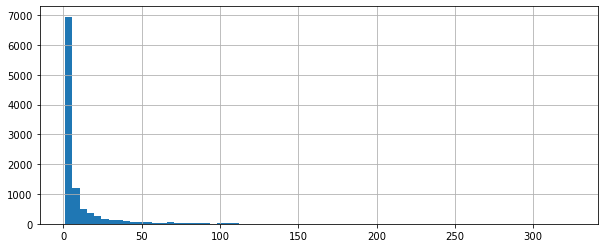

In [20]:
plt.figure(figsize=(10,4))
ratings['Number of ratings'].hist(bins=70)
plt.show()

From above graph we can see that 0-50 count of ratings are more counts means many users based on popularity that particular movies are watched.

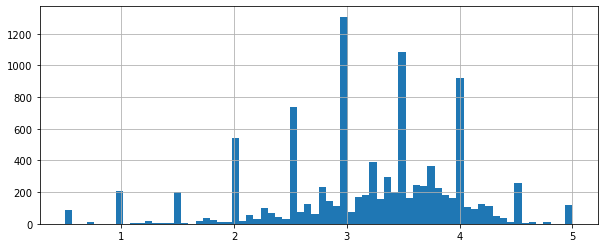

In [21]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)
plt.show()

In [22]:
ratings.head()

,rating,Number of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


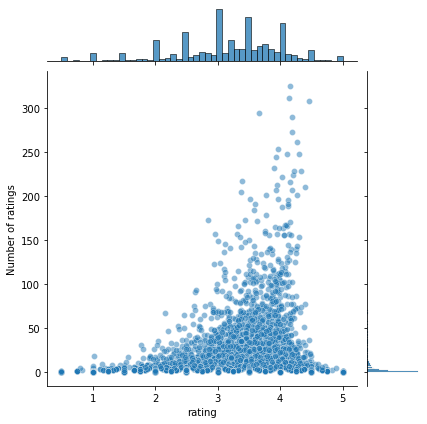

In [23]:
sns.jointplot(x='rating',y='Number of ratings',data=ratings,alpha=0.5)

In [24]:
## First lets create a Pivot matrix

movie_features_df=dataset.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [26]:
dataset.loc[419]

movieId                                       5
title        Father of the Bride Part II (1995)
genres                                   Comedy
userId                                      192
rating                                      3.5
timestamp         1970-01-01 00:00:01.247082288
Name: 419, dtype: object

In [30]:
movie_features_df

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

2720


In [28]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Dreamers, The (2003):

1: Sentinel, The (2006), with distance of 0.38536250898103364:
2: Whatever Works (2009), with distance of 0.4245627334758908:
3: Stepford Wives, The (2004), with distance of 0.4366575924884256:
4: Heartbreak Kid, The (2007), with distance of 0.4435606808226614:
5: Next Three Days, The (2010), with distance of 0.46132910783499514:
